In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

***Поделючаем датасет и исключаем ненужные данные, а именно значение "Iris-versicolor" ***

In [45]:

iris = pd.read_csv('/kaggle/input/iris/Iris.csv')
iris.drop(iris[iris['Species'] == "Iris-versicolor"].index, inplace=True)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


***'Iris-setosa' превращаем в "0", а 'Iris-virginica' превращаем в "1"***

In [46]:
encoder = LabelEncoder()
iris['Species'] = encoder.fit_transform(iris['Species'])
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


***В массив "Х" записываем данные характеристик, а в массив "у" "Species"***

In [47]:
X = iris.iloc[:, 1:-1].values
y = iris.iloc[:,   -1].values 

***Алгоритм обучения K-средних с визуализацией даннх***

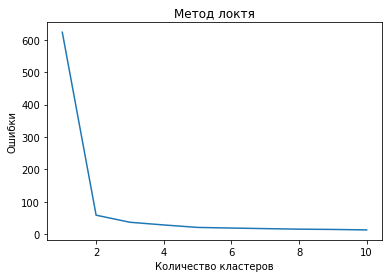

In [55]:
wcss = []
  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Ошибки')
plt.show()


***Реализация кластеризации K-средних***

In [49]:
kmeans = KMeans(n_clusters=2,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X)

***Визуализация кластер***

[[5.006 3.418 1.464 0.244]
 [6.588 2.974 5.552 2.026]]


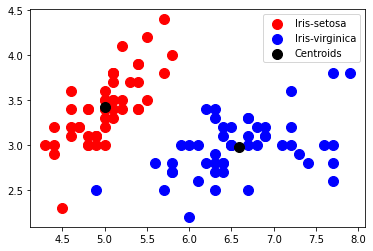

In [50]:

print(kmeans.cluster_centers_) 
plt.scatter(X[y_kmeans   == 0, 0], X[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans   == 1, 0], X[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   
plt.legend()
plt.show()

***Определяем параметры качества классификации с помощью матрици ошибок "confusion_matrix" м визиализируем***

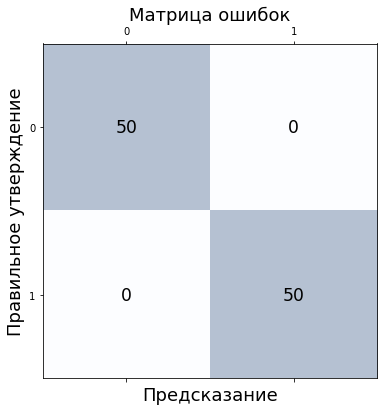

In [56]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, y_kmeans) 

fig, ax = plt.subplots(figsize=(6, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Предсказание', fontsize=18)
plt.ylabel('Правильное утверждение', fontsize=18)
plt.title('Матрица ошибок', fontsize=18)
plt.show()

***Определяем чувствительность и специфичность***

In [54]:
sensitivity = conf_matrix[0,0]/(conf_matrix[0,0] + conf_matrix[0,1])
print('Чуствительность = ', sensitivity)
specificity = conf_matrix[1,1]/(conf_matrix[1,0] + conf_matrix[1,1])
print('Спицефичность  = ', specificity)

Чуствительность =  1.0
Спицефичность  =  1.0
